<a href="https://colab.research.google.com/github/Binaaa04/magang_DataScience/blob/main/Data_Sains_Sabrina_Rahmadini_Tugas_Modul_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIVISI DATA SCIENCE
“PENUGASAN 4 : EXPLORATORY DATA ANALYSIS”



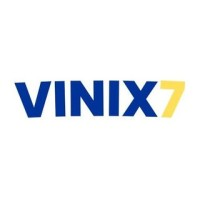




Nama : Sabrina Rahmadini

Paket : Basic

Universitas : Politeknik Negeri Malang


The main mission :

 • Analisis eksplorasi pada dataset

 • Gunakan statistik dasar dan Visualisasi data dasar

 • Menemukan dan mendokumentasikan pola awal yang menarik

 Objektif Tugas :

 • Analisis Statistik Deskriptif

 Sajikan statistik deskriptif dari kolom kolom relevan pada dataset. Berikan intrpretasi singkat terkait angka angka statistik tersebut.

 • Analisis visual untuk menjawab pertanyaan

  - Bagaimana perbandingan nilai antar kategori?

  - Bagaimana distribusi/sebaran data?
  
  - Apakah ada korelasi antar kolom?
  
  • Dokumentasi insight dan hipotesis
  
  Bedasarkan hasil analisis statistik dan visual, rumuskan dan narasikan minimal 3 temuan awal (insight) yang paling menarik dari eksplorasi kalian dan hipotesis.

Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              10000 non-null  object 
 2   Quantity          10000 non-null  object 
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       10000 non-null  float64
 5   Payment Method    10000 non-null  object 
 6   Location          10000 non-null  object 
 7   Transaction Date  10000 non-null  object 
 8   Log_Total_Spent   10000 non-null  float64
dtypes: float64(3), object(6)
memory usage: 703.3+ KB
None

Statistik Deskriptif:
       Price Per Unit  Total Spent  Log_Total_Spent
count     10000.00000  10000.00000     10000.000000
mean          2.95265      8.87795         2.107032
std           1.24396      5.86059         0.625116
min           1.00000      1.00000         0.693147
25%           2.000

/tmp/ipython-input-1972187149.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Location", y="Quantity", hue="Item", estimator=sum, ci=None)


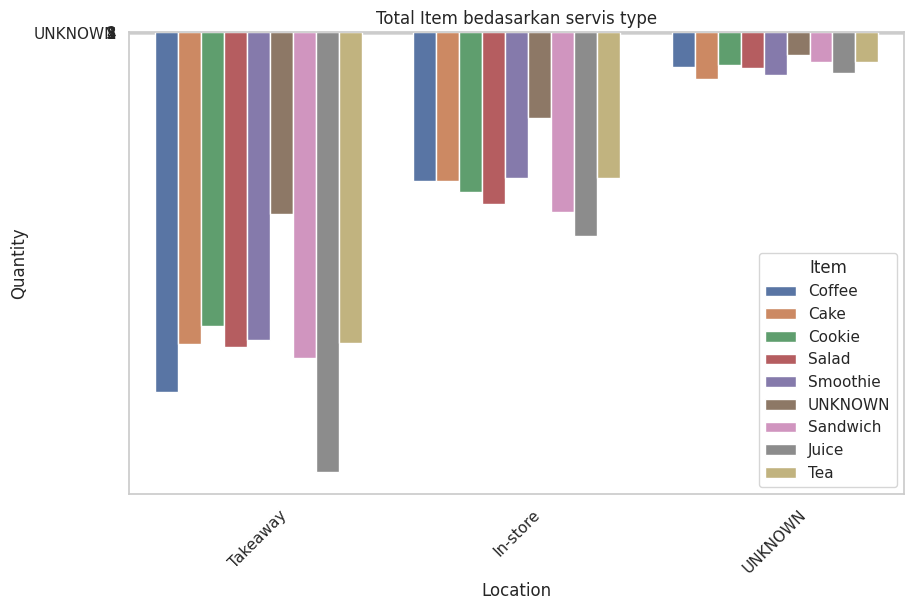

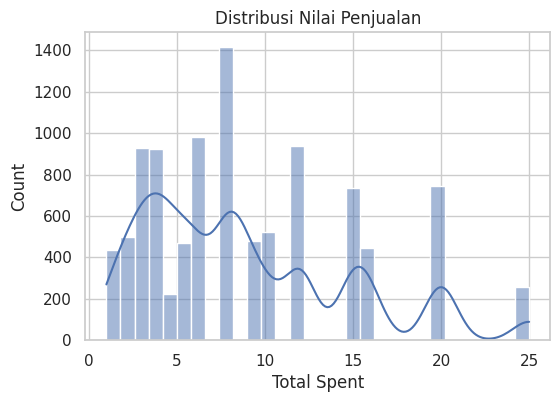

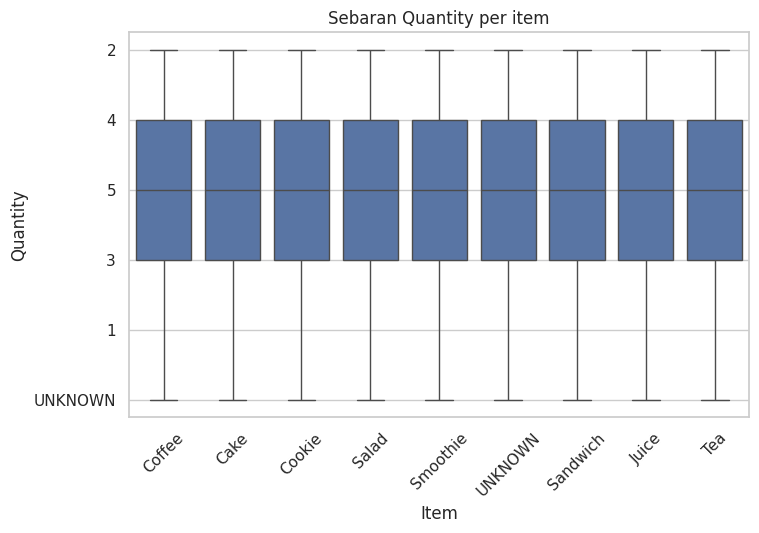

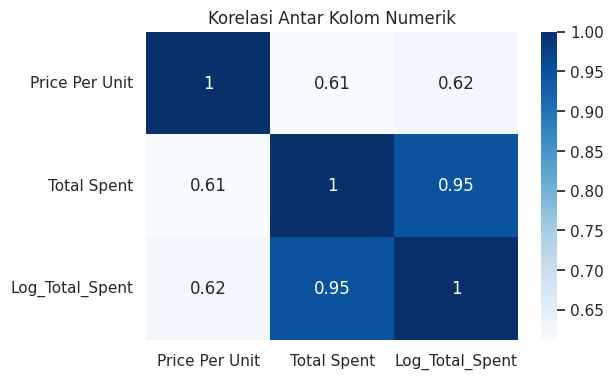

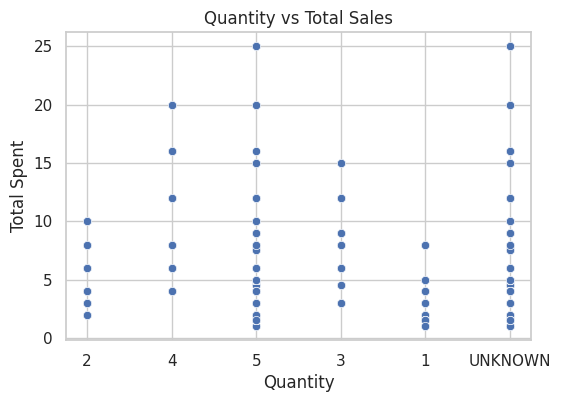

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load dataset ===
df = pd.read_csv('/content/drive/MyDrive/MAGANG/DATA SCIENCE/dataSalesCafeClean.csv', low_memory=False)
data = pd.DataFrame(df)

# === Cek struktur data ===
print("Struktur Data:")
print(data.info())

# === Statistik deskriptif ===
print("\nStatistik Deskriptif:")
print(data.describe())

print("\n--- Statistik Deskriptif Kategori ---")
for col in df.select_dtypes(include="object").columns:
    print(f"\nKolom: {col}")
    print(df[col].value_counts().head())

df = df.replace("ERROR", "UNKNOWN")

# === Analisis Visual ===
sns.set(style="whitegrid")

# Total penjualan tiap Item bedasarkan servis type
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Location", y="Quantity", hue="Item", estimator=sum, ci=None)
plt.title("Total Item bedasarkan servis type")
plt.xticks(rotation=45)
plt.legend(title="Item")
plt.show()

# Distribusi total sales
plt.figure(figsize=(6,4))
sns.histplot(df["Total Spent"], bins=30, kde=True)
plt.title("Distribusi Nilai Penjualan")
plt.show()

# Boxplot quantity per item
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Item", y="Quantity")
plt.title("Sebaran Quantity per item")
plt.xticks(rotation=45)
plt.show()

# Korelasi antar numeric
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Korelasi Antar Kolom Numerik")
plt.show()

# Scatter plot quantity vs total_sales
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Quantity", y="Total Spent")
plt.title("Quantity vs Total Sales")
plt.show()

** Gambaran Umum Data**

Harga produk relatif murah, berkisar antara Rp1 – Rp5, dengan rata-rata sekitar Rp3.

Nilai belanja per transaksi juga kecil sampai sedang, rata-rata sekitar Rp9, dengan transaksi tertinggi mencapai Rp25.

**Produk yang Paling Banyak Dibeli**

Produk dengan jumlah transaksi terbanyak adalah Juice (1504 kali pembelian).

Setelah itu ada Coffee, Salad, Cake, dan Sandwich dengan jumlah transaksi yang tidak jauh berbeda.

Hal ini menunjukkan semua produk laris, meski Juice sedikit lebih unggul dibanding yang lain.

 **Pola Jumlah Pembelian**

Mayoritas pelanggan membeli 5 item sekaligus dalam satu transaksi.

Pola ini menunjukkan bahwa kebanyakan pelanggan tidak hanya membeli satu produk, melainkan sekalian membeli beberapa.

 **Metode Pembayaran**

Digital Wallet menjadi metode pembayaran yang paling dominan (hampir 50% transaksi).

Cash dan Credit Card jumlahnya hampir seimbang, namun tetap lebih rendah dibanding e-wallet.

Terdapat data yang tidak valid ("ERROR" dan "UNKNOWN"), yang sebaiknya diperlakukan sebagai data hilang.

Kesimpulannya, tren pembayaran sudah bergeser ke arah cashless.

**Lokasi Transaksi**

Sebagian besar transaksi dilakukan secara Takeaway (63%).

Hanya sekitar 30% pelanggan memilih makan/minum di tempat (In-store).

Sisanya berupa data tidak valid.

Artinya, sebagian besar pelanggan cenderung memilih membeli untuk dibawa pulang, mungkin karena lebih praktis atau sedang terburu-buru.

**Aktivitas Penjualan Harian**

Tanggal dengan transaksi terbanyak adalah 2 Juli 2023 (489 transaksi).

Beberapa tanggal lain juga memiliki transaksi yang tinggi, kemungkinan karena faktor promo atau momen tertentu (misalnya akhir pekan).

1. **Total Item berdasarkan Servis Type**
   Diagram ini memperlihatkan jumlah item yang terjual berdasarkan jenis layanan, yaitu *Takeaway*, *In-store*, dan kategori *Unknown*. Terlihat bahwa baik layanan *Takeaway* maupun *In-store* sama-sama memiliki jumlah penjualan yang tinggi untuk beberapa item populer seperti *Coffee*, *Cake*, dan *Juice*. Adanya kategori *Unknown* menunjukkan bahwa masih ada data yang tidak tercatat dengan jelas terkait jenis layanannya. Hal ini bisa menjadi perhatian karena data yang tidak lengkap berpotensi memengaruhi analisis.

2. **Distribusi Nilai Penjualan (Total Spent)**
   Diagram histogram dengan *kde* ini menunjukkan sebaran nilai belanja pelanggan. Dari grafik terlihat bahwa sebagian besar transaksi berada di rentang Rp5 hingga Rp10, sementara transaksi dengan nilai lebih besar (di atas Rp20) jumlahnya relatif sedikit. Artinya, mayoritas pelanggan melakukan pembelian dalam jumlah kecil hingga menengah, sedangkan pembelian besar jarang terjadi.

3. **Sebaran Quantity per Item**
   Diagram boxplot ini memperlihatkan distribusi jumlah pembelian (*quantity*) untuk setiap jenis item. Hampir semua item memiliki pola sebaran yang mirip, dengan nilai tengah (*median*) berada di sekitar angka 4–5. Namun, terlihat juga adanya data *outlier* pada beberapa item yang jumlah pesanannya jauh lebih sedikit maupun lebih banyak dari rata-rata. Secara umum, jumlah pembelian antar item relatif stabil.

4. **Korelasi Antar Kolom Numerik**
   Heatmap ini menampilkan hubungan antar variabel numerik. Dari hasilnya, terlihat bahwa kolom *Total Spent* memiliki korelasi sangat kuat dengan *Log_Total_Spent* (0,95), yang wajar karena *Log_Total_Spent* merupakan transformasi dari *Total Spent*. Selain itu, *Price Per Unit* juga memiliki korelasi sedang dengan *Total Spent* (0,61), artinya semakin tinggi harga per unit, cenderung berpengaruh terhadap total belanja pelanggan, meskipun tidak sepenuhnya menentukan.

5. **Quantity vs Total Sales**
   Scatter plot ini menggambarkan hubungan antara jumlah pembelian (*quantity*) dengan total belanja pelanggan (*total spent*). Dari grafik terlihat bahwa meskipun ada pola peningkatan total belanja saat jumlah pembelian bertambah, hubungan ini tidak selalu konsisten. Ada beberapa kasus di mana jumlah item sedikit tetapi nilai belanja cukup besar, kemungkinan karena item tersebut memiliki harga yang tinggi. Sebaliknya, pembelian dengan jumlah banyak tidak selalu menghasilkan total belanja yang besar jika produk yang dibeli berharga murah.


Dari hasil analisis data penjualan, ada beberapa hal menarik yang bisa diambil. Pertama, kebanyakan pelanggan belanja dalam jumlah kecil sampai sedang. Rata-rata uang yang keluar ada di kisaran 5–10 ribu. Jadi bisa dibilang, transaksi besar itu jarang banget. Artinya, kafe ini lebih sering jadi tempat beli minum atau camilan cepat, bukan untuk belanja banyak sekaligus.

Kedua, cara belanja pelanggan juga beda-beda. Ada yang lebih sering beli buat dibawa pulang (takeaway), ada juga yang seneng makan/minum langsung di tempat (in-store). Menariknya, pola penjualan per item juga bisa beda tergantung cara belanjanya. Tapi sayangnya masih ada transaksi yang nyangkut sebagai unknown. Ini nunjukin kalau pencatatan masih ada yang bolong, jadi sebaiknya diperbaiki biar datanya makin akurat.

Ketiga, soal harga dan total belanja, ternyata nggak selalu lurus. Memang harga tinggi bisa bikin total belanja naik, tapi jumlah barang juga punya pengaruh. Kadang beli dikit tapi mahal hasilnya gede, kadang beli banyak tapi murah totalnya malah kecil. Jadi, strategi harga dan jenis produk sama-sama penting buat ngatur pemasukan.

Dari tiga poin ini, ada beberapa saran praktis yang bisa dipertimbangin:

Karena mayoritas transaksi kecil, bisa dipertimbangin buat bikin promo bundling murah biar orang terdorong belanja lebih banyak.
Data takeaway dan in-store bisa dimanfaatin buat ngatur stok. Misalnya, kalau kopi lebih banyak dibeli takeaway, stok kemasan siap bawa harus diperhatiin.
Segera beresin data yang masih unknown biar analisis ke depan nggak bias.

Dengan begitu, keputusan bisnis bisa lebih tepat sasaran karena udah ada gambaran jelas dari datanya.